In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import Animal Kingdom attractions
aka = pd.read_csv("../attractions/attractions_ak.csv")
aka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31039 entries, 0 to 31038
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   datetime             31039 non-null  object
 1   kilimanjaro_safaris  31039 non-null  object
 2   expedition_everest   31039 non-null  object
 3   dinosaur             31039 non-null  object
 4   flight_of_passage    31039 non-null  object
 5   navi_river           31039 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [3]:
# Added DATE column to ak from the datetime column, using it to concat dataframes
aka['DATE'] = pd.to_datetime(aka['datetime']).dt.date
aka['DATE'] = pd.to_datetime(aka["DATE"])
print(aka.info())
aka.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31039 entries, 0 to 31038
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             31039 non-null  object        
 1   kilimanjaro_safaris  31039 non-null  object        
 2   expedition_everest   31039 non-null  object        
 3   dinosaur             31039 non-null  object        
 4   flight_of_passage    31039 non-null  object        
 5   navi_river           31039 non-null  object        
 6   DATE                 31039 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.7+ MB
None


,datetime,kilimanjaro_safaris,expedition_everest,dinosaur,flight_of_passage,navi_river,DATE
0,2015-01-01 07:00:00,5.0,5.0,5.0,na,na,2015-01-01
1,2015-01-01 08:00:00,9.0,5.0,9.0,na,na,2015-01-01


In [4]:
# Import Metadata
md = pd.read_csv("../metadata/ak_metadata.csv")
md.head(2)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,...,AKOPENTOM,AKCLOSETOM,AKHOURSTOM,MKDAYSBEFORENONEVENT,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_AK,CapacityLostWGT_AK
0,2015-01-01,5,0,0,1,2015,0,5,1,0,...,8:00,20:00,12.0,1.0,53.375714,70.3,50.2,0.12,236654,20971646
1,2015-01-02,6,1,0,1,2015,2,5,0,0,...,8:00,19:00,11.0,1.0,53.750714,70.3,50.0,0.12,236654,20971646


In [5]:
# Convert DATE column to datetime
md['DATE'] = pd.to_datetime(md["DATE"])
md.head(2)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,...,AKOPENTOM,AKCLOSETOM,AKHOURSTOM,MKDAYSBEFORENONEVENT,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_AK,CapacityLostWGT_AK
0,2015-01-01,5,0,0,1,2015,0,5,1,0,...,8:00,20:00,12.0,1.0,53.375714,70.3,50.2,0.12,236654,20971646
1,2015-01-02,6,1,0,1,2015,2,5,0,0,...,8:00,19:00,11.0,1.0,53.750714,70.3,50.0,0.12,236654,20971646


In [6]:
# Merge aka and md dataframes
ak = pd.merge(aka, md, how='outer', on='DATE')
# Dropped unneeded Date column
ak.drop('DATE', axis = 1,  inplace = True)
# Set datetime to the Index and sorted by it
ak.set_index('datetime', inplace=True)
ak.sort_index(inplace=True)
ak.head(2)

,kilimanjaro_safaris,expedition_everest,dinosaur,flight_of_passage,navi_river,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,AKOPENTOM,AKCLOSETOM,AKHOURSTOM,MKDAYSBEFORENONEVENT,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_AK,CapacityLostWGT_AK
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 07:00:00,5.0,5.0,5.0,na,na,5.0,0.0,0.0,1.0,2015.0,...,8:00,20:00,12.0,1.0,53.375714,70.3,50.2,0.12,236654.0,20971646.0
2015-01-01 08:00:00,9.0,5.0,9.0,na,na,5.0,0.0,0.0,1.0,2015.0,...,8:00,20:00,12.0,1.0,53.375714,70.3,50.2,0.12,236654.0,20971646.0


In [7]:
for col in ['AKOPEN', 'AKCLOSE',  'AKEMHOPEN', 'AKEMHCLOSE',
       'AKOPENYEST', 'AKCLOSEYEST', 'AKOPENTOM',
       'AKCLOSETOM','SUNSET_WDW']:

    ak[col] = np.where(ak[col] == "24:00",'23:59' ,ak[col])
    ak[col] = np.where(ak[col] == "27:00",'23:59' ,ak[col])
    ak[col] = np.where(ak[col] == "26:00",'23:59' ,ak[col])
    ak[col] = np.where(ak[col] == "25:00",'23:59' ,ak[col])
    ak[col] = np.where(ak[col] == "23:55",'23:59' ,ak[col])
    ak[col] = np.where(ak[col] == "29:59",'23:59' ,ak[col])
    ak[col] = np.where(ak[col] == "30:00",'23:59' ,ak[col])

In [8]:
for col in ['AKOPEN', 'AKCLOSE',  'AKEMHOPEN', 'AKEMHCLOSE',
       'AKOPENYEST', 'AKCLOSEYEST', 'AKOPENTOM',
       'AKCLOSETOM','SUNSET_WDW']:
    ak[col] = ak[col].str.replace(":","")

In [9]:
ak.fillna(0, inplace=True)
ak.isnull().sum()

kilimanjaro_safaris    0
expedition_everest     0
dinosaur               0
flight_of_passage      0
navi_river             0
                      ..
WEATHER_WDWHIGH        0
WEATHER_WDWLOW         0
WEATHER_WDWPRECIP      0
CapacityLost_AK        0
CapacityLostWGT_AK     0
Length: 69, dtype: int64

In [10]:
for col in ['AKOPEN', 'AKCLOSE',  'AKEMHOPEN', 'AKEMHCLOSE',
       'AKOPENYEST', 'AKCLOSEYEST', 'AKOPENTOM',
       'AKCLOSETOM','SUNSET_WDW']:
    ak[col] = ak[col].astype(int)

In [11]:
for col in ['inSession', 'inSession_Enrollment', 'inSession_wdw',
       'inSession_sqrt_WDW', 'inSession_DC', 'inSession_Central_FL',
       'inSession_Drive1_FL', 'inSession_Drive2_FL',
       'inSession_Florida', 'inSession_Mardi_Gras', 'inSession_Midwest',
       'inSession_NY_NJ', 'inSession_NY_NJ_PA', 'inSession_New_England',
       'inSession_New_Jersey', 'inSession_Nothwest', 'INSESSION_PLANES',
       'inSession_SoCal', 'inSession_Southwest']:
    ak[col] = ak[col].str.replace(r'%', r'').astype('float')/-100

In [12]:
for col in ['kilimanjaro_safaris','expedition_everest','dinosaur','flight_of_passage','navi_river']:
    ak[col] = pd.to_numeric(ak[col],errors='coerce')
ak.fillna(0, inplace=True)

In [13]:
# Dummified the WDWSEASON column
ak = pd.get_dummies(ak,columns = ['WDWSEASON'])

In [14]:
# Created new column for hour as a feature
ak['hour'] = ak.index
ak['hour'] = ak.hour.str[11:13]
ak['hour'] = pd.to_numeric(ak['hour'])*100
ak.tail(5)

,kilimanjaro_safaris,expedition_everest,dinosaur,flight_of_passage,navi_river,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,WDWSEASON_MARDI GRAS,WDWSEASON_MARTIN LUTHER KING JUNIOR DAY,WDWSEASON_MEMORIAL DAY,WDWSEASON_PRESIDENTS WEEK,WDWSEASON_SEPTEMBER LOW,WDWSEASON_SPRING,WDWSEASON_SUMMER BREAK,WDWSEASON_THANKSGIVING,WDWSEASON_WINTER,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-30 21:00:00,0.0,36.0,18.0,202.0,83.0,2.0,363.0,52.0,12.0,2019.0,...,0,0,0,0,0,0,0,0,0,2100
2019-12-30 22:00:00,0.0,13.0,14.0,150.0,31.0,2.0,363.0,52.0,12.0,2019.0,...,0,0,0,0,0,0,0,0,0,2200
2019-12-30 23:00:00,0.0,0.0,0.0,0.0,0.0,2.0,363.0,52.0,12.0,2019.0,...,0,0,0,0,0,0,0,0,0,2300
2019-12-31 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2019-12-31 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,100


In [15]:
ak.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31039 entries, 2015-01-01 07:00:00 to 2019-12-31 01:00:00
Data columns (total 87 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kilimanjaro_safaris                      31039 non-null  float64
 1   expedition_everest                       31039 non-null  float64
 2   dinosaur                                 31039 non-null  float64
 3   flight_of_passage                        31039 non-null  float64
 4   navi_river                               31039 non-null  float64
 5   DAYOFWEEK                                31039 non-null  float64
 6   DAYOFYEAR                                31039 non-null  float64
 7   WEEKOFYEAR                               31039 non-null  float64
 8   MONTHOFYEAR                              31039 non-null  float64
 9   YEAR                                     31039 non-null  float64
 10  HOLIDAYPX          

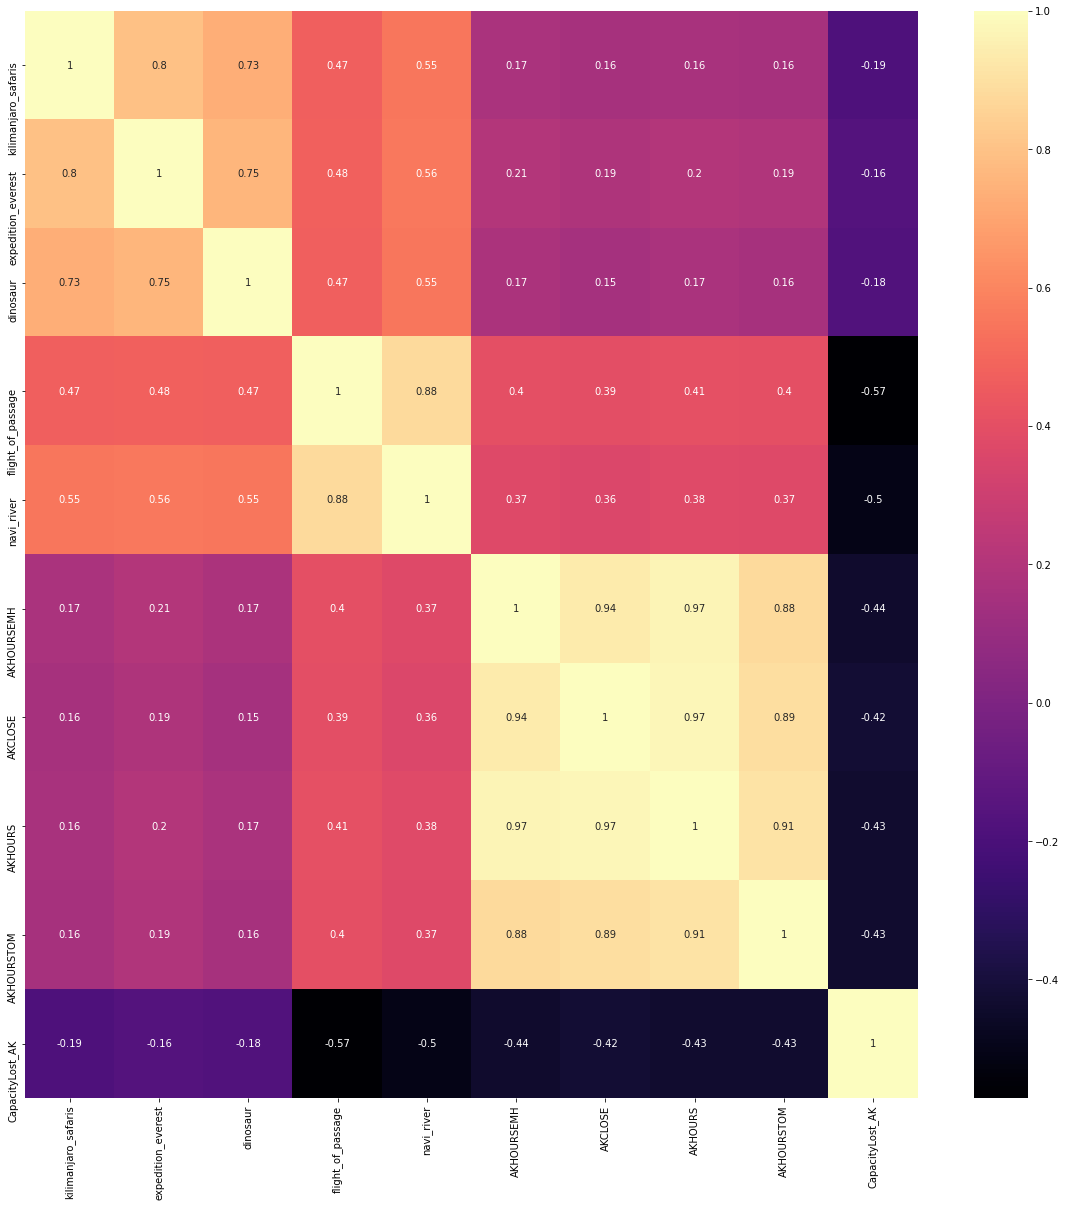

In [16]:
top_corr = ak.corr()
top_corr_features = top_corr.index[abs(top_corr['kilimanjaro_safaris']) > .15]
plt.figure(figsize=(20,20))
g = sns.heatmap(ak[top_corr_features].corr(),annot=True,cmap="magma")

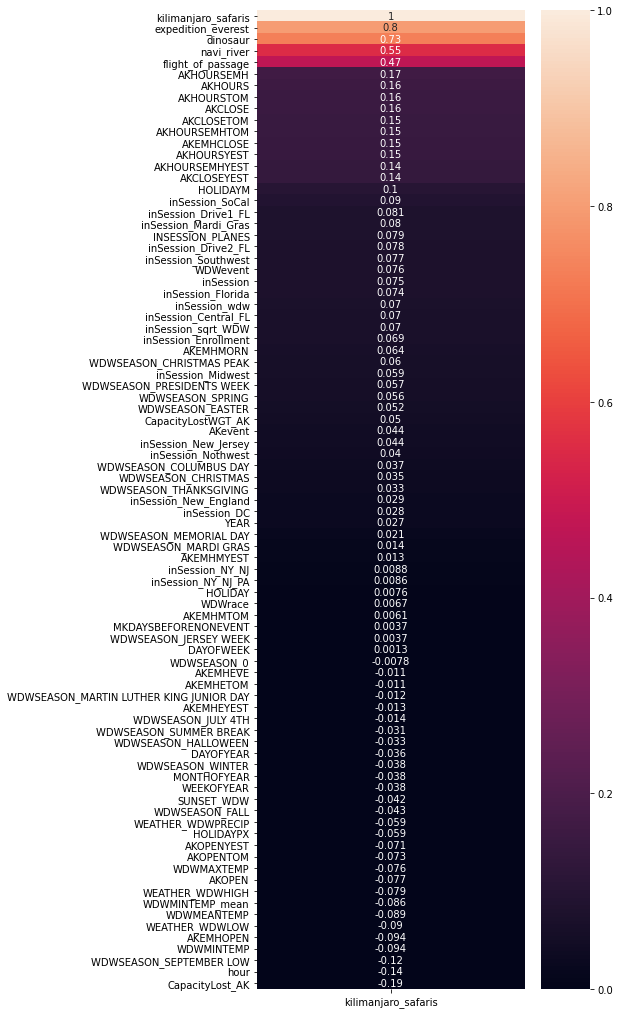

In [17]:
corr = ak.corr()
plt.figure(figsize = (6,18))
sns.heatmap(corr[['kilimanjaro_safaris']].sort_values(by = 'kilimanjaro_safaris', ascending = False).head(85),vmin = 0, annot = True)
plt.show()

In [18]:
import numpy as np
from math import sqrt
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from datetime import date
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

In [20]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn import svm

In [52]:
features = ['expedition_everest','dinosaur','flight_of_passage','navi_river', 'inSession',
            'YEAR', 'AKHOURS', 'DAYOFWEEK','HOLIDAYM',
            'WDWSEASON_CHRISTMAS', 'WDWSEASON_CHRISTMAS PEAK', 'AKOPEN',
       'WDWSEASON_COLUMBUS DAY', 'WDWSEASON_EASTER', 'WDWSEASON_FALL',
       'WDWSEASON_HALLOWEEN', 'WDWSEASON_JERSEY WEEK', 'WDWSEASON_JULY 4TH',
       'WDWSEASON_MARDI GRAS', 'WDWSEASON_MARTIN LUTHER KING JUNIOR DAY',
       'WDWSEASON_MEMORIAL DAY', 'WDWSEASON_PRESIDENTS WEEK',
       'WDWSEASON_SEPTEMBER LOW', 'WDWSEASON_SPRING', 'WDWSEASON_SUMMER BREAK',
       'WDWSEASON_THANKSGIVING', 'WDWSEASON_WINTER', 'hour','CapacityLost_AK']
y = ak['kilimanjaro_safaris']
X = ak[features]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.02, random_state=21)
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [54]:
# Created my model and started the train test split
linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
linreg_preds_train = linreg.predict(X_train_sc)
linreg_rms_train = sqrt(mean_squared_error(y_train, linreg_preds_train))
linreg_rms_train

16.135953802593693

In [56]:
linreg_preds_test = linreg.predict(X_test_sc)
linreg_rms_test = sqrt(mean_squared_error(y_test, linreg_preds_test))
linreg_rms_test

16.734726476585084

## KNN

In [27]:
# Instiantiated KNN and fitted the training
knn = KNeighborsRegressor()
knn.fit(X_train_sc, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [28]:
knn_preds_train = knn.predict(X_train_sc)
knn_rms_train = sqrt(mean_squared_error(y_train, knn_preds_train))
knn_rms_train

11.238849779309758

In [29]:
knn_preds_test = knn.predict(X_test_sc)
knn_rms_test = sqrt(mean_squared_error(y_test, knn_preds_test))
knn_rms_test


14.635084573827777

## Decision Tree Model

In [31]:

# Instiantiate model and fit
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
dt_preds_train = dt.predict(X_train_sc)
dt_rms_train = sqrt(mean_squared_error(y_train, dt_preds_train))
dt_rms_train

0.21644228212137132

In [33]:
dt_preds_test = dt.predict(X_test_sc)
dt_rms_test = sqrt(mean_squared_error(y_test, dt_preds_test))
dt_rms_test

19.474207724722362

## Bagged Decision Tree

In [35]:
# Instiantiate model and fit
bag = BaggingRegressor()
bag.fit(X_train_sc, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [36]:
bag_preds_train = bag.predict(X_train_sc)
bag_rms_train = sqrt(mean_squared_error(y_train, bag_preds_train))
bag_rms_train

5.9285939526637685

In [37]:
bag_preds_test = bag.predict(X_test_sc)
bag_rms_test = sqrt(mean_squared_error(y_test, bag_preds_test))
bag_rms_test

14.66845468350134

## Random Forests

In [39]:
# Instiantiate model and fit
rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:

rf_preds_train = rf.predict(X_train_sc)
rf_rms_train = sqrt(mean_squared_error(y_train, rf_preds_train))
rf_rms_train

5.015400983989995

In [41]:
rf_preds_test = rf.predict(X_test_sc)
rf_rms_test = sqrt(mean_squared_error(y_test, rf_preds_test))
rf_rms_test

14.015195661468162

## ADA boost

In [43]:
# Instiantiate model and fit
ada = AdaBoostRegressor()
ada.fit(X_train_sc, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [44]:
ada_preds_train = dt.predict(X_train_sc)
ada_rms_train = sqrt(mean_squared_error(y_train, dt_preds_train))
ada_rms_train

0.21644228212137132

In [45]:
ada_preds_test = ada.predict(X_test_sc)
ada_rms_test = sqrt(mean_squared_error(y_test, ada_preds_test))
ada_rms_test

23.414682161161124

## SVM

In [47]:
# Instiantiate model and fit
svr = svm.SVR()
svr.fit(X_train_sc, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
svr_preds_train = svr.predict(X_train_sc)
svr_rms_train = sqrt(mean_squared_error(y_train, svr_preds_train))
svr_rms_train

15.754139199960038

In [49]:
svr_preds_test = svr.predict(X_test_sc)
svr_rms_test = sqrt(mean_squared_error(y_test, svr_preds_test))
svr_rms_test

16.405117199825664